In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("D:/ASSIGNMENTS/logistic regression/bank-full.csv",sep=';')
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.drop(["contact"],inplace=True,axis=1)

In [5]:
bank.drop(["default"],inplace=True,axis=1)

In [6]:
bank.drop(["day"],inplace=True,axis=1)

In [7]:
bank.drop(["month"],inplace=True,axis=1)

In [8]:
bank.drop(["poutcome"],inplace=True,axis=1)

In [9]:
bank.shape

(45211, 12)

In [10]:
bank=pd.get_dummies(bank,columns=['job'])

In [11]:
bank=pd.get_dummies(bank,columns=['marital'])

In [12]:
bank=pd.get_dummies(bank,columns=['education'])

In [13]:
bank=pd.get_dummies(bank,columns=['housing'])

In [14]:
bank=pd.get_dummies(bank,columns=['loan'])

In [15]:
bank=pd.get_dummies(bank,columns=['y'])

In [16]:
bank.shape

(45211, 31)

In [17]:
x=bank.iloc[:,0:29]
y=bank.iloc[:,30]

In [18]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=classifier.predict(x)
y_pred_df=pd.DataFrame({'Actual':y,'Predicted':y_pred})

In [20]:
y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


In [21]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y,y_pred)
confusion

array([[39167,   755],
       [ 4256,  1033]], dtype=int64)

In [22]:
((39167+1033)/(39167+755+4256+1033))*100

88.91641414699963

In [23]:
from sklearn.metrics import classification_report
report=classification_report(y,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
fpr,tpr,threshold=roc_curve(y,y_pred)

In [26]:
auc=roc_auc_score(y,y_pred)

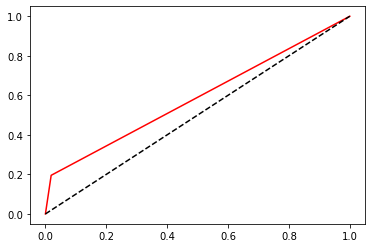

In [27]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')

In [28]:
auc*100

58.8199572357627